In [57]:
#Libraries
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [58]:
#import dataset
dataset = pd.read_csv('fullEDfullmodel.csv')
dataset.head()

X = dataset.loc[:, dataset.columns != 'class']
y = dataset['class']

In [59]:
#train, test, split (80/20 - train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#classifier
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7832659518368782


Please use the attached csv. Work on building a decision tree using a stratified train-test 80%/20% split and investigate how to tune the classification to achieve as close to 95% sensitivity as possible. If you can do that, then try maintain that 95% sensitivity and tune the hyperparameters to maximize specificity.
 
I expect that this initial task will result in your asking questions about the data and the task. Don’t spend too long spinning your wheels if you get stuck. Work with each other or ask Katie, my brother, or me. We are all a big team trying to make this work.

In [75]:
parameters = {'criterion': ['gini'], 'splitter': ['random'], 
              'max_depth': [None], 'class_weight': [None], 
              'max_leaf_nodes': [75, 95, 100]}
sfk = StratifiedKFold(n_splits=10)

#for x in range(10):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
clf2 = GridSearchCV(clf, parameters, cv=sfk, n_jobs=-1)
clf2.fit(X_train, y_train)

DT_clf = DecisionTreeClassifier(**clf2.best_params_)
DT_clf.fit(X_train, y_train)
    
#predict probability of classification with threshold of >= 0.25. Increased sensitivity by around 12%.
#This could definitely be tuned more.
y_pred = (DT_clf.predict_proba(X_test) >= 0.12)

#Returns probability of classification as a tuple.
pred_values = DT_clf.predict_proba(X_test)
print('Pred Values:', pred_values)
    
#predict_proba returns a 2 length boolean tuple. The remainder of this block makes it comparable to ['class']
y_pred = [item[1] for item in y_pred]
for i in range(len(y_pred)):
    if y_pred[i] == False:
        y_pred[i] = 'F'
    else:            
        y_pred[i] = 'T'

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Best parameters:', clf2.best_params_)

Pred Values: [[0.98729742 0.01270258]
 [0.45886654 0.54113346]
 [0.7125     0.2875    ]
 ...
 [0.88180979 0.11819021]
 [0.08016032 0.91983968]
 [0.98729742 0.01270258]]
Accuracy: 0.6937071541571453
Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 100, 'splitter': 'random'}


In [76]:
rsfk = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10, random_state = 1)

tre_score = cross_validate(clf2, X, y, scoring = 'accuracy', cv = rsfk, n_jobs = -1)

print("Accuracy: " + str(tre_score['test_score'].mean()))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f'Sensitivity: {tp/(tp+fn)}')
print(f'Specificity: {tn/(tn+fp)}')

print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.8419034024256351
Sensitivity: 0.9555236728837877
Specificity: 0.5781071835803877
Confusion Matrix:
[[4563 3330]
 [ 155 3330]]


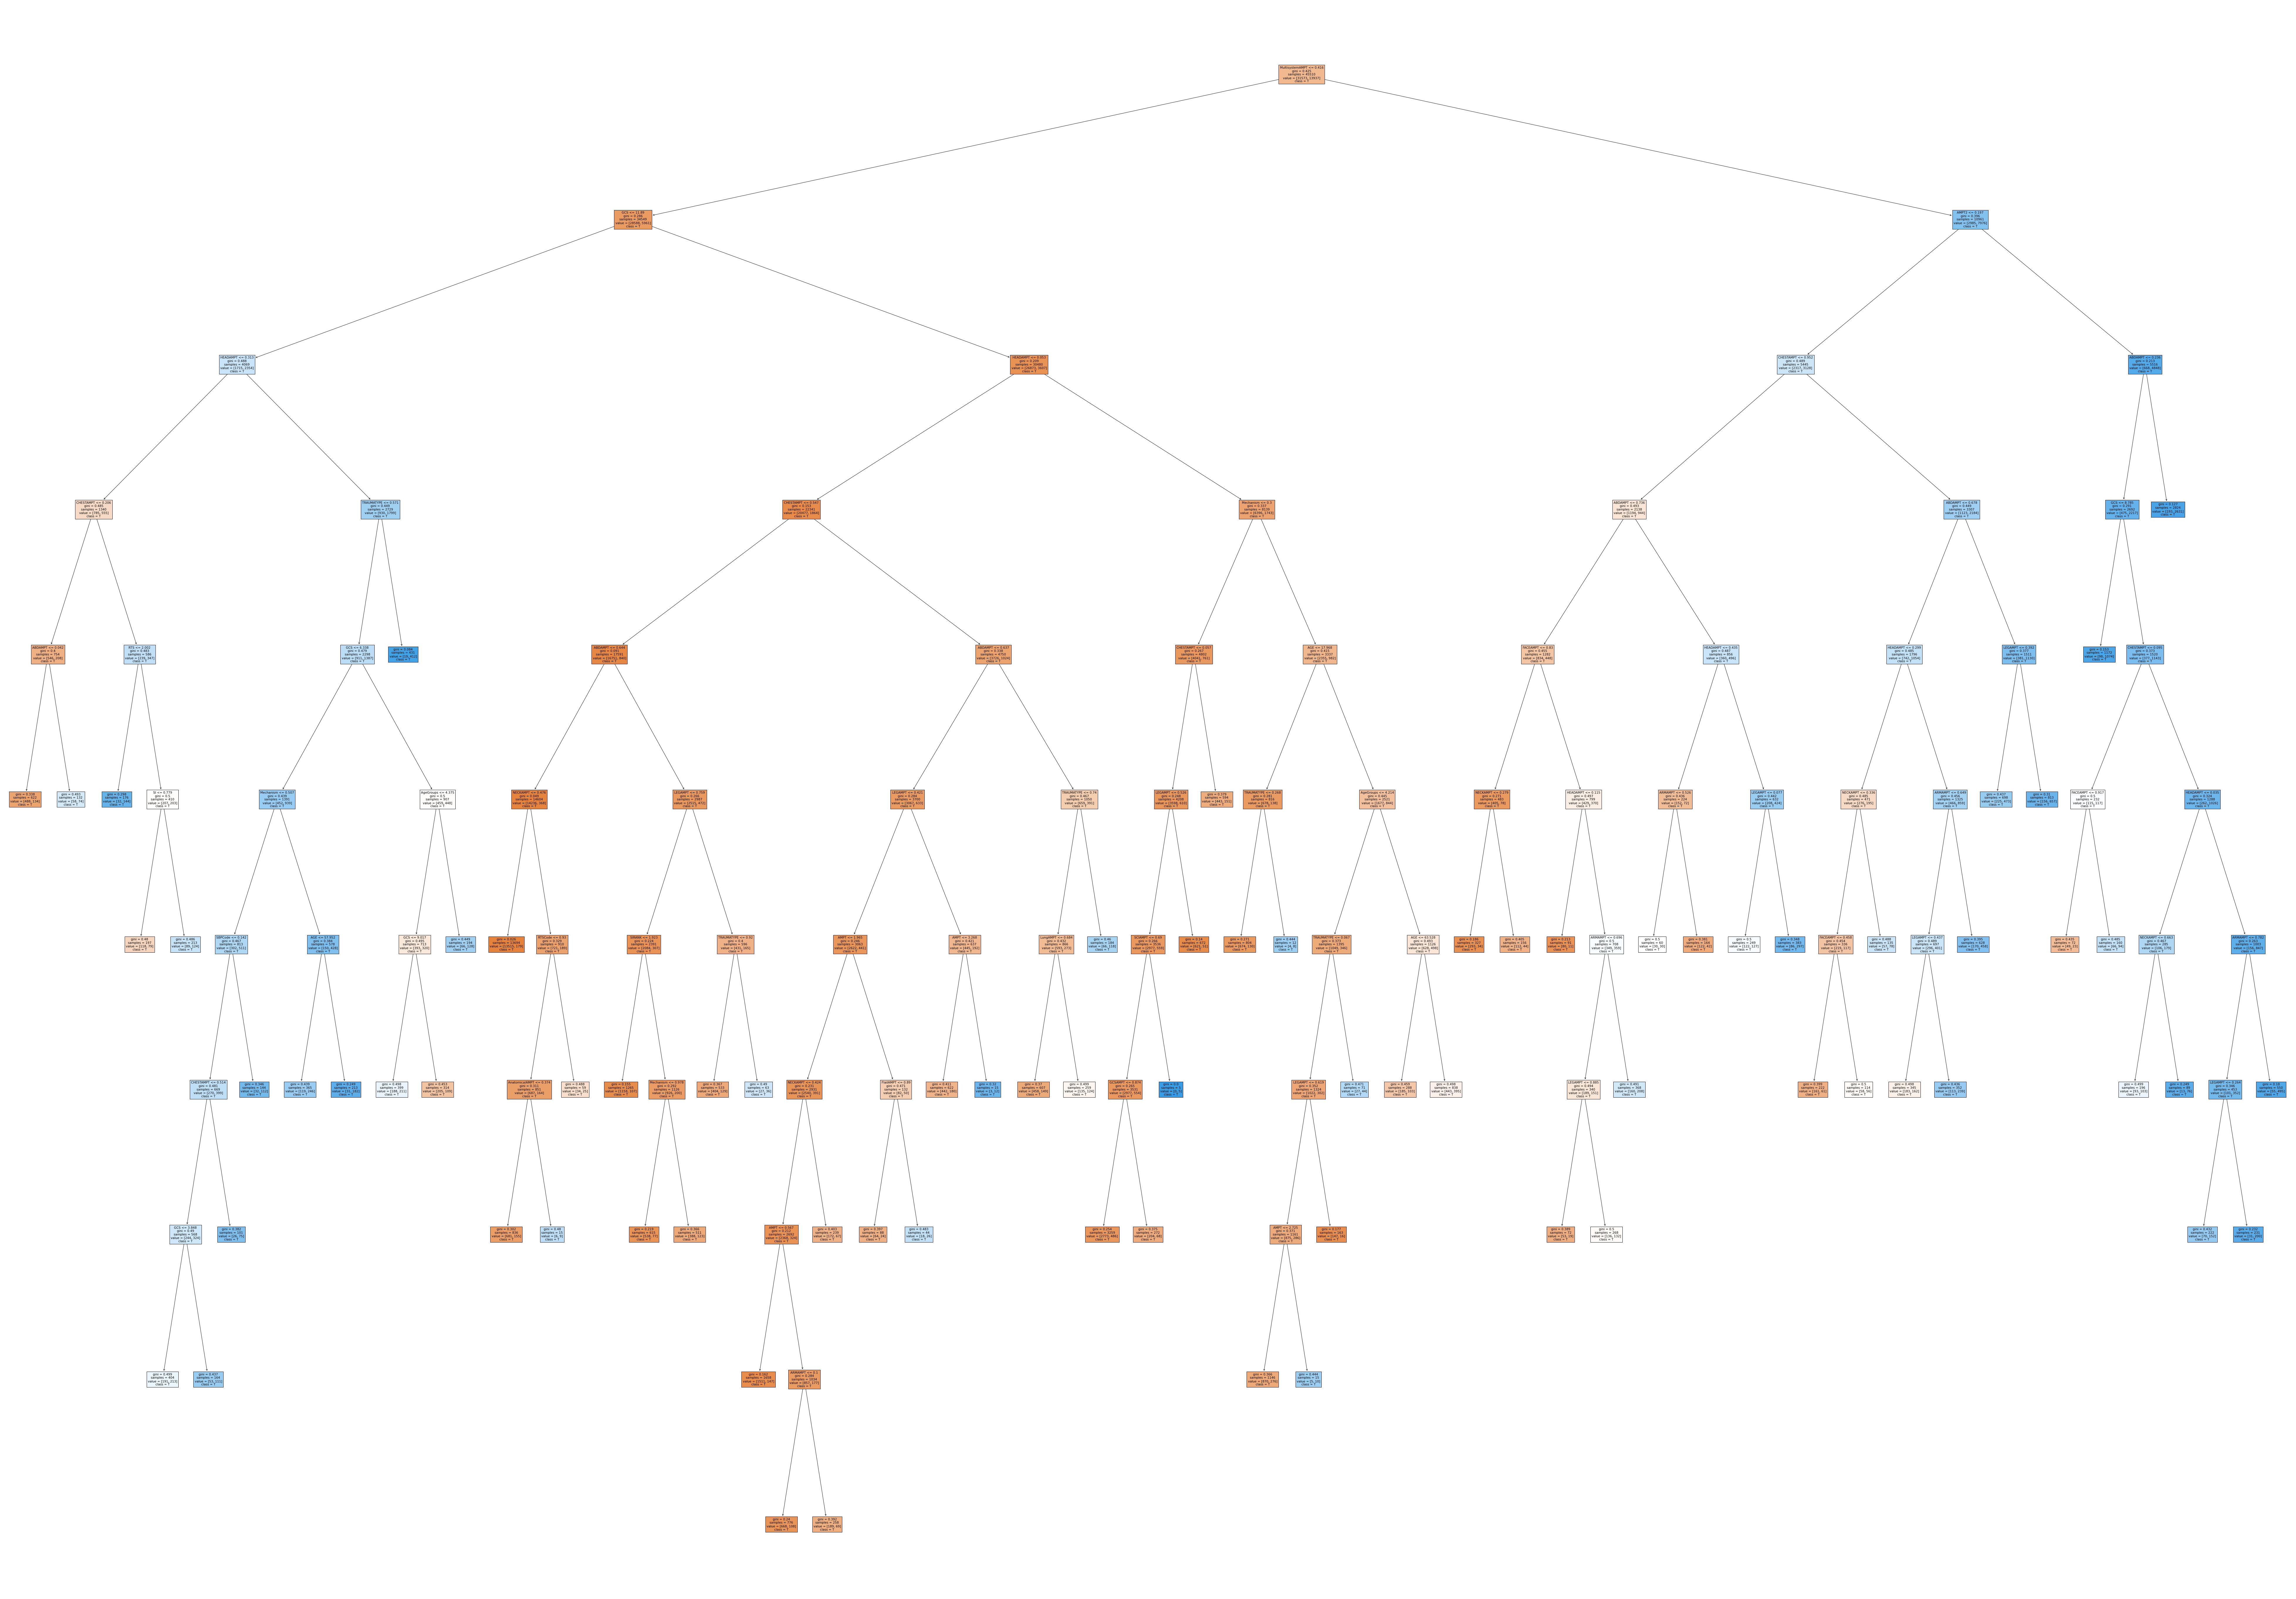

<Figure size 432x288 with 0 Axes>

In [71]:
#Prints out a long text form of the tree

DT_clf.fit(X_train, y_train)

_, ax = plt.subplots(figsize=(140,100)) # Resize figure
tree.plot_tree(DT_clf, filled=True, ax=ax, feature_names = (dataset.columns)[:-1], class_names = dataset['class'])
plt.show()

#Saves a png of the tree.
plt.savefig('tree_visualization.png')